In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading the training Data

X_train = pd.read_csv('../Data/X_train.csv')
y_train = pd.read_csv('../Data/y_train.csv')

print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")

X_train: (400, 9)
y_train: (400, 1)


In [4]:
#removing any categorical features
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()
print(f"Categorical features: {categorical_features}")

X_train_encoded = X_train.copy()
label_encoders = {}
for col in categorical_features:
    if col != 'User_ID':
        le = LabelEncoder()
        X_train_encoded[col] = le.fit_transform(X_train[col])
        label_encoders[col] = le

if 'User_ID' in X_train_encoded.columns:
    X_train_encoded = X_train_encoded.drop('User_ID', axis=1)

print("Categorical features encoded.")

Categorical features: ['User_ID', 'Gender', 'Social_Media_Platform']
Categorical features encoded.


In [5]:
#preparing y and scaling x
y_train_processed = y_train.values.ravel()

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
print("Features scaled.")


Features scaled.


In [6]:
#setting up the SVR model with GridSearchCV
svr = SVR()
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10],
}

cv = KFold(n_splits=5, shuffle=True, random_state=1234)
grid_search = GridSearchCV(svr, param_grid, cv=cv, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train_processed)

best_svr = grid_search.best_estimator_
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {-grid_search.best_score_}")

y_pred_train = best_svr.predict(X_train_scaled)
mse_train = mean_squared_error(y_train_processed, y_pred_train)
r2_train = r2_score(y_train_processed, y_pred_train)
print(f"Training MSE: {mse_train}")
print(f"Training R^2: {r2_train}")

Best parameters: {'C': 0.1, 'kernel': 'linear'}
Best cross-validation score: 0.9019904783851189
Training MSE: 0.8541518909729704
Training R^2: 0.6410183804684126


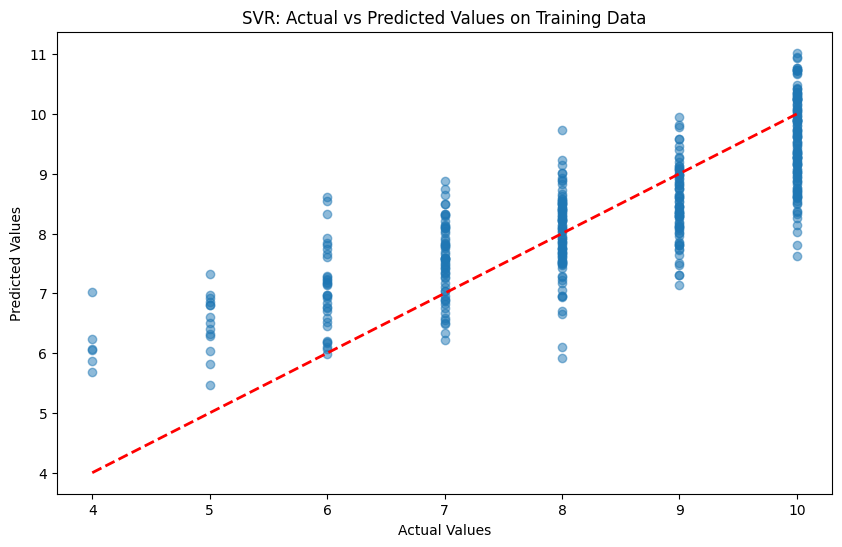

In [8]:
#plotting actual vs predicted values

plt.figure(figsize=(10, 6))
plt.scatter(y_train_processed, y_pred_train, alpha=0.5)
plt.plot([y_train_processed.min(), y_train_processed.max()], [y_train_processed.min(), y_train_processed.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('SVR: Actual vs Predicted Values on Training Data')
plt.show()